<a href="https://colab.research.google.com/github/nigoda/machine_learning/blob/main/17_Underfitting_and_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip uninstall tensorflow
# !pip install tensorflow==2.0.0-beta1  

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


### **Download the IMDB dataset**

In [ ]:
NUM_WORDS = 10000
(train_data,train_labels),(test_data,test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dimension):
  #Create an all-zero matrix of shape (len(sequences),dimension)
  results = np.zeros((len(sequences), dimension))
  for i,word_indies in enumerate(sequences):
    results[i, word_indies] = 1.0 # set specific indices of resulta[i] to 1s
  return results

train_data = multi_hot_sequences(train_data,dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data,dimension = NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Multi-hot-encoding our lists means turning them into vector of 0s to 1s. Concretely, this would mean for instance turining the sequences [3,5] into 10,000 dimensional vector that would be all-zeros expect for indices 3 and 5, which would be ones,

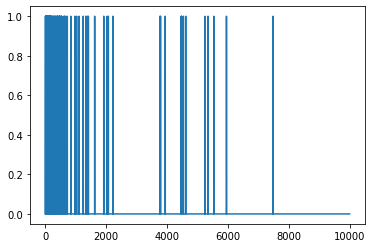

In [ ]:
plt.plot(train_data[0])

### **Demonstrate Overfitting**
Create a baseline model

In [ ]:
  # 'input_shape' is only required here so that '.summary' works.
baseline_model = keras.Sequential([
  keras.layers.Dense(16, activation='relu',input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data,test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4696 - accuracy: 0.8105 - binary_crossentropy: 0.4696 - val_loss: 0.3196 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.3196
Epoch 2/20
49/49 - 2s - loss: 0.2354 - accuracy: 0.9158 - binary_crossentropy: 0.2354 - val_loss: 0.2838 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2838
Epoch 3/20
49/49 - 2s - loss: 0.1729 - accuracy: 0.9401 - binary_crossentropy: 0.1729 - val_loss: 0.2977 - val_accuracy: 0.8836 - val_binary_crossentropy: 0.2977
Epoch 4/20
49/49 - 2s - loss: 0.1370 - accuracy: 0.9551 - binary_crossentropy: 0.1370 - val_loss: 0.3218 - val_accuracy: 0.8775 - val_binary_crossentropy: 0.3218
Epoch 5/20
49/49 - 2s - loss: 0.1117 - accuracy: 0.9643 - binary_crossentropy: 0.1117 - val_loss: 0.3526 - val_accuracy: 0.8746 - val_binary_crossentropy: 0.3526
Epoch 6/20
49/49 - 2s - loss: 0.0923 - accuracy: 0.9719 - binary_crossentropy: 0.0923 - val_loss: 0.3838 - val_accuracy: 0.8700 - val_binary_crossentropy: 0.3838
Epoch 7/20
49/49 - 2s - loss

### **Create a smaller model.**

In [ ]:
smaller_model = keras.Sequential([
 keras.layers.Dense(4, activation='relu',input_shape=(NUM_WORDS,)),
 keras.layers.Dense(4,activation='relu'),
 keras.layers.Dense(1,activation = 'sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics =['accuracy','binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data = (test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5955 - accuracy: 0.7378 - binary_crossentropy: 0.5955 - val_loss: 0.5014 - val_accuracy: 0.8472 - val_binary_crossentropy: 0.5014
Epoch 2/20
49/49 - 1s - loss: 0.4072 - accuracy: 0.8866 - binary_crossentropy: 0.4072 - val_loss: 0.3725 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3725
Epoch 3/20
49/49 - 1s - loss: 0.2929 - accuracy: 0.9141 - binary_crossentropy: 0.2929 - val_loss: 0.3131 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.3131
Epoch 4/20
49/49 - 1s - loss: 0.2332 - accuracy: 0.9277 - binary_crossentropy: 0.2332 - val_loss: 0.2911 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2911
Epoch 5/20
49/49 - 1s - loss: 0.1975 - accuracy: 0.9378 - binary_crossentropy: 0.1975 - val_loss: 0.2869 - val_accuracy: 0.8855 - val_binary_crossentropy: 0.2869
Epoch 6/20
49/49 - 1s - loss: 0.1734 - accuracy: 0.9463 - binary_crossentropy: 0.1734 - val_loss: 0.2860 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2860
Epoch 7/20
49/49 - 1s - loss

### **Create a bigger model**

In [ ]:
bigger_model = keras.models.Sequential([
  keras.layers.Dense(512,activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(1,activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bigger_history = bigger_model.fit(train_data,train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data,test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 14s - loss: 0.3491 - accuracy: 0.8493 - binary_crossentropy: 0.3491 - val_loss: 0.2878 - val_accuracy: 0.8832 - val_binary_crossentropy: 0.2878
Epoch 2/20
49/49 - 13s - loss: 0.1377 - accuracy: 0.9501 - binary_crossentropy: 0.1377 - val_loss: 0.3348 - val_accuracy: 0.8733 - val_binary_crossentropy: 0.3348
Epoch 3/20
49/49 - 13s - loss: 0.0409 - accuracy: 0.9882 - binary_crossentropy: 0.0409 - val_loss: 0.4488 - val_accuracy: 0.8697 - val_binary_crossentropy: 0.4488
Epoch 4/20
49/49 - 13s - loss: 0.0054 - accuracy: 0.9992 - binary_crossentropy: 0.0054 - val_loss: 0.6154 - val_accuracy: 0.8698 - val_binary_crossentropy: 0.6154
Epoch 5/20
49/49 - 13s - loss: 6.2681e-04 - accuracy: 1.0000 - binary_crossentropy: 6.2681e-04 - val_loss: 0.7056 - val_accuracy: 0.8711 - val_binary_crossentropy: 0.7056
Epoch 6/20
49/49 - 13s - loss: 2.0023e-04 - accuracy: 1.0000 - binary_crossentropy: 2.0023e-04 - val_loss: 0.7550 - val_accuracy: 0.8715 - val_binary_crossentropy: 0.7550
Epoch 

### **Plot the training and validation loss**

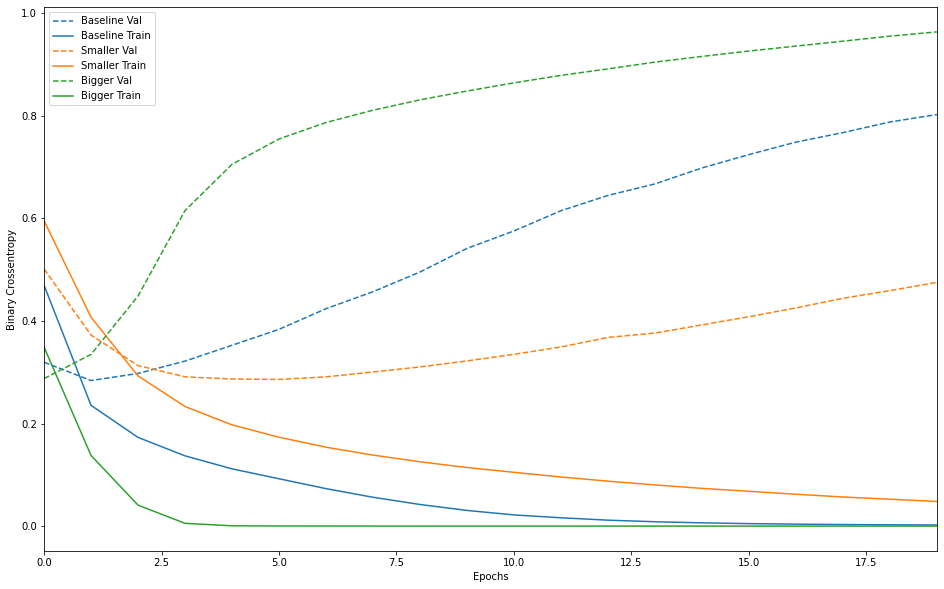

In [ ]:
def plot_history(histories,key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label = name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('baseline',baseline_history),
             ('smaller',smaller_history),
              ('bigger', bigger_history)])


# Strategies to prevent Overfitting

### **Add weight regularization**

Occan's Razar principle: Gives two explanations for something, the explanation most likely to be correct is the "Simplest" one, the one that makes the least amount of assumptions. 

This also applies to the model learned by neural networks: given some traning data and a network architecuture, there are multiple sets of weights values(multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simpler model" in this context is a model where the distribution of parameter values has less entropy(or a model with fewer parameter altogether, as we saw on the section above). Thus a common way to mitigate overflow is to put constraints on the complexity of a network by forcing its weight only to take small values, which makes the distribution of weight values more "regular", This is called "weight regularization", and it is done by adding to the lossfunction of the network a cost associated with having larger weights. This cost comes in two flavors.

*   L1 regularization, where the cost added is proportional to the absolute values of the weight co-efficients(i.e, to what is called "L1 norm" of the weigth)
*   L2 regularization, where the cost added is proportional to the square of the value of the weights co-efficiants(i.e, to what is called squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathamatically the exact same as L2 regularixation.

L1 regularization introduces sparsity to make some of your weight parameters zero.
L2 regularization will penalize the weight parameter without making them sparse-one reason why L2 is more common.

In tf.keras, weight regularization is added by passing weight regularizer instances to layer as keyboard argument. let's add L2 weight regularization now.
                   
                    loss function = ^ penalty 

In [ ]:
l2_model = keras.models.Sequential([                      
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data= (test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5202 - accuracy: 0.8151 - binary_crossentropy: 0.4799 - val_loss: 0.3783 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3339
Epoch 2/20
49/49 - 1s - loss: 0.3052 - accuracy: 0.9098 - binary_crossentropy: 0.2555 - val_loss: 0.3372 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2841
Epoch 3/20
49/49 - 1s - loss: 0.2570 - accuracy: 0.9290 - binary_crossentropy: 0.2014 - val_loss: 0.3450 - val_accuracy: 0.8836 - val_binary_crossentropy: 0.2878
Epoch 4/20
49/49 - 2s - loss: 0.2351 - accuracy: 0.9371 - binary_crossentropy: 0.1760 - val_loss: 0.3529 - val_accuracy: 0.8828 - val_binary_crossentropy: 0.2927
Epoch 5/20
49/49 - 1s - loss: 0.2205 - accuracy: 0.9446 - binary_crossentropy: 0.1590 - val_loss: 0.3681 - val_accuracy: 0.8787 - val_binary_crossentropy: 0.3058
Epoch 6/20
49/49 - 2s - loss: 0.2091 - accuracy: 0.9513 - binary_crossentropy: 0.1459 - val_loss: 0.3975 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.3340
Epoch 7/20
49/49 - 1s - loss

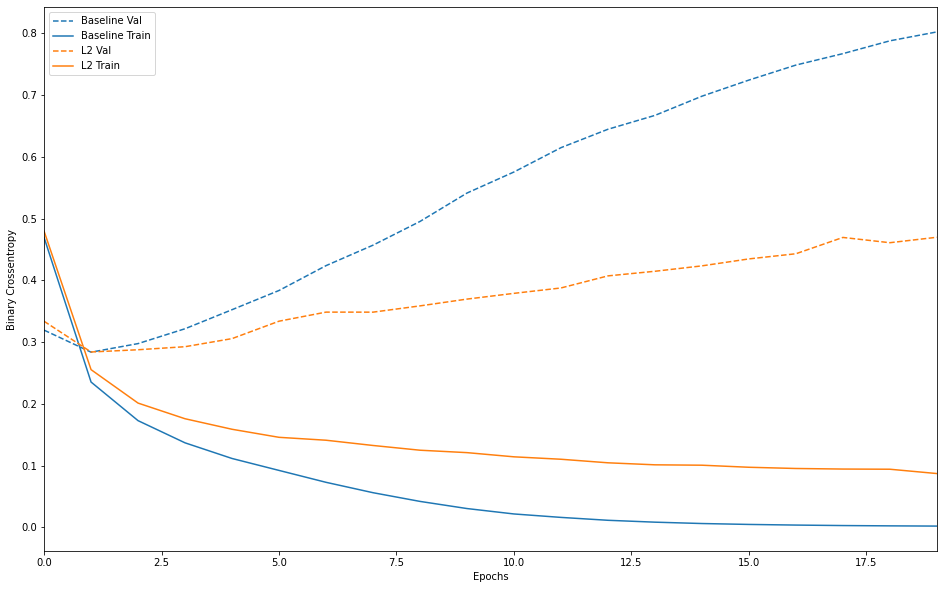

In [ ]:
plot_history([('baseline', baseline_history),
              ('l2',l2_model_history)])

### **Add dropout**

Dropout is one of the most effective and most commonly used regularization techniques for neural network, developed by Hinton and his student at the University of Toronto. Dropout, appplied to the layer, consist of randomly "dropping out"(i.e, set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returns a vector[0.2,0.5,1.3,0.8,1.1]. The "dropout rate" is usually set between 0.2 and 0.5. At test time, no unit are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, So as to balance for the fact that more units are active than at training time.

In tf.keras you can introduce dropout in a network via the Dropout layer, which get applied to the output of layer right before.

Let's add two Dropout layer in our IMDB network to see how well they do at reducing overfitting.

In [ ]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics= ['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.6189 - accuracy: 0.6412 - binary_crossentropy: 0.6189 - val_loss: 0.4729 - val_accuracy: 0.8553 - val_binary_crossentropy: 0.4729
Epoch 2/20
49/49 - 1s - loss: 0.4566 - accuracy: 0.7973 - binary_crossentropy: 0.4566 - val_loss: 0.3432 - val_accuracy: 0.8819 - val_binary_crossentropy: 0.3432
Epoch 3/20
49/49 - 1s - loss: 0.3677 - accuracy: 0.8502 - binary_crossentropy: 0.3677 - val_loss: 0.2905 - val_accuracy: 0.8875 - val_binary_crossentropy: 0.2905
Epoch 4/20
49/49 - 1s - loss: 0.3058 - accuracy: 0.8892 - binary_crossentropy: 0.3058 - val_loss: 0.2743 - val_accuracy: 0.8888 - val_binary_crossentropy: 0.2743
Epoch 5/20
49/49 - 1s - loss: 0.2600 - accuracy: 0.9092 - binary_crossentropy: 0.2600 - val_loss: 0.2769 - val_accuracy: 0.8888 - val_binary_crossentropy: 0.2769
Epoch 6/20
49/49 - 1s - loss: 0.2229 - accuracy: 0.9226 - binary_crossentropy: 0.2229 - val_loss: 0.2868 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2868
Epoch 7/20
49/49 - 1s - loss

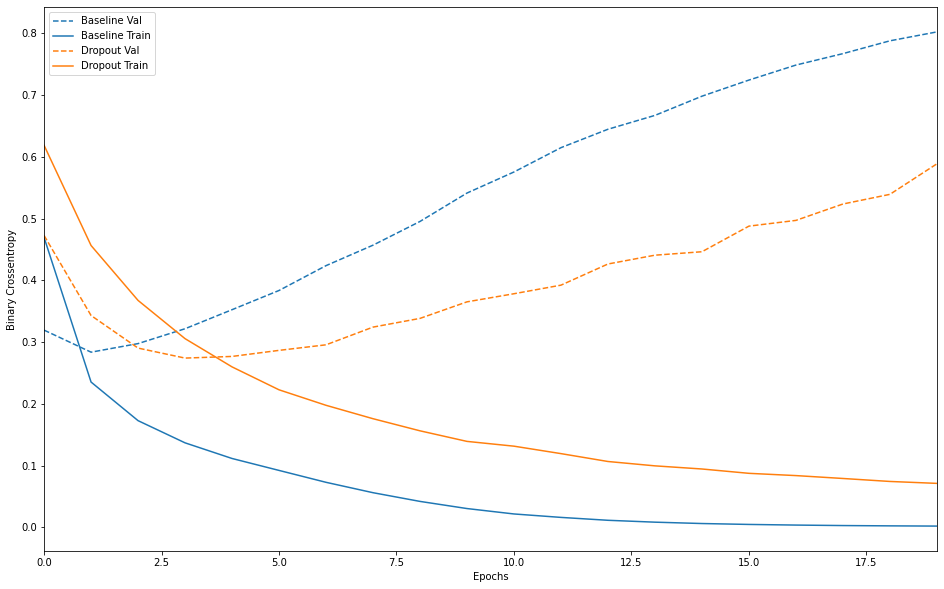

In [ ]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Adding dropout is a clear improvement over the baseline model.

To recap: here are the most common ways to prevent overfitting in neural networks:

1.   Get moretraining data.
2.   Reduce the capacity of the network.
3.   Add weight regularization.
4.   Add dropout.

